## Histograma e Boxplot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile

#Lendo a base de dados
caminho = "/content/drive/MyDrive/Bootcamp Alura/Módulo 03/Arquivos/dados/PeNSE_2015_AMOSTRA2.zip"
zip = ZipFile(caminho)
caminho_pasta_zipada = zip.namelist()[1]

dados = pd.read_csv(zip.open(caminho_pasta_zipada), sep = ";", thousands = ".", decimal = ",")
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,VB01007,VB01008A,VB01010A,VB01011,VB01012,VB01013,VB01014,VB01015A,VB01016,VB01017,VB01018,VB01019,VB01020A,VB01021,VB01022,VB01023,VB01024,VB01025,VB01026,VB02001,VB02002,VB02004A,VB02010,VB02011,VB02013,VB02017A,VB02018A,VB02019A,VB02020A,VB02021,...,VB11005,VB11006,VB11007,VB12001,VB12002,VB12003,VB13001,VB13002A,VB13004A,VB13005,VB13006,VB13007,VB13008,VB13009,VB14001,VB14002,VB16001A01,VB16001A02,VB16001A03,VB16001A04,VB16001A05,VB16001A06,VB16001A07,VB16001A08,VB17001,VB17002,VB17003,VB17004,VB17005,VB17006,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,2,7,3,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,5,1,8,3,4,3,6,6,1,6,1,-1,2,...,2,1,2,1,1,4,2,-1,3,1,1,-1,1,1,2,2,1,2,2,2,2,2,2,2,371.0,1570.0,37.1,157.0,2,1,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,1,7,3,2,-1,1,1,1,1,1,2,2,2,4,1,2,2,5,3,8,2,1,8,8,6,1,1,5,-1,2,...,2,3,2,4,4,4,1,2,3,3,1,-1,1,1,2,2,2,2,2,1,2,2,2,2,502.0,1520.0,50.2,152.0,2,2,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,1,5,5,2,-1,2,1,1,1,1,2,3,1,4,1,2,2,5,3,2,3,1,8,2,8,1,1,5,5,1,...,2,1,2,1,2,3,1,2,1,2,5,99,1,-1,2,2,1,1,1,1,1,1,1,1,482.0,1614.0,48.2,161.4,2,2,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,1,7,4,2,-1,1,1,1,1,1,2,4,2,4,1,2,2,6,3,2,4,1,3,2,7,1,5,1,-1,2,...,2,1,2,2,2,4,1,10,3,1,2,-1,1,-1,2,2,1,2,2,2,1,2,2,2,694.0,1725.0,69.4,172.5,2,3,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,2,5,4,2,-1,2,1,1,1,1,2,5,1,4,1,2,2,6,5,6,3,5,2,6,2,1,5,1,5,1,...,2,1,4,2,2,4,1,3,2,2,2,13,1,-1,1,2,1,1,1,1,1,1,1,1,789.0,1675.0,78.9,167.5,2,4,1223,1,299.735235,1,2,4,1,5,1,296


In [ ]:
#Calculando o IMC
#É necessário converter a altura de cm para m
dados["IMC"] = dados["VB17003"] / ((dados["VB17004"]/100)**2)
dados["IMC"]

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: IMC, Length: 16556, dtype: float64

In [ ]:
#Criando as classes do IMC

'''
pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)

Bin values into discrete intervals.
Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable 
For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins

include_lowestbool, default False
Whether the first interval should be left-inclusive or not
'''

classes = [0, 18.5, 25, 30, 60]
labels = ["abaixo", "normal", "sobrepeso", "obesidade"]

dados["CLASSE_IMC"] = pd.cut(x = dados["IMC"], bins = classes, labels = labels, include_lowest = True)

dados[["IMC", "CLASSE_IMC"]]

,IMC,CLASSE_IMC
0,15.051321,abaixo
1,21.727839,normal
2,18.502907,normal
3,23.322831,normal
4,28.122076,sobrepeso
...,...,...
16551,20.113223,normal
16552,17.930782,abaixo
16553,23.968489,normal
16554,18.995343,normal


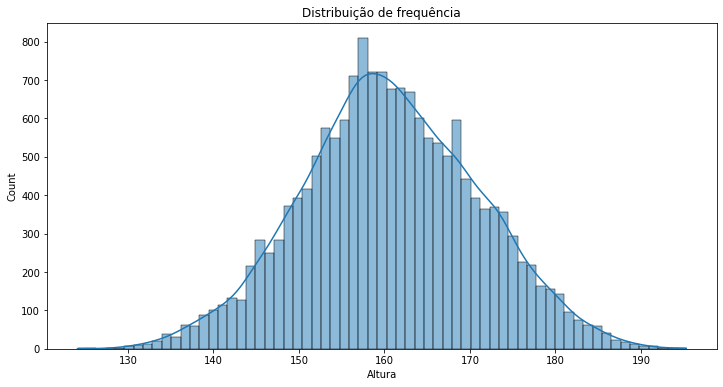

In [ ]:
#Plotando o histograma - Altura
import seaborn as sns

'''
DataFrame.plot.kde(bw_method=None, ind=None, **kwargs)
Generate Kernel Density Estimate plot using Gaussian kernels
In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable 
This function uses Gaussian kernels and includes automatic bandwidth determination
'''

#ax = sns.histplot(x = "VB17004", data = dados, bins = 15, kde = True)
ax = sns.histplot(x = "VB17004", data = dados, kde = True)
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de frequência")
ax.set_xlabel("Altura")
ax;

### Desafio 01: Calcular o desvio padrão, média, moda e mediana e plotar no gráfico de histograma

In [ ]:
#Criando uma função para plotar o histograma e o desvio padrão, a média, a moda e a mediana 
def cria_histograma(cod_pergunta: str, pergunta: str, dados = dados):

  '''
  Esta função cria um histograma a partir do código da pergunta, além disso plota o desvio padrão, a média, 
  a moda e a mediana
  
  Parâmetros:
    cod_pergunta: string com o código da pergunta
    dados: DataFrame com os dados do arquivo "PENSE_AMOSTRA2_ALUNO.CSV"
    pergunta: string com a pergunta
 '''

  #Calculando o desvio padrão, a média, a moda e a mediana 
  media = dados[cod_pergunta].mean()
  moda = dados[cod_pergunta].mode()[0]
  mediana = dados[cod_pergunta].median()
  desvio_padrao = dados[cod_pergunta].std()
  desvio_padrao_inferior = media - desvio_padrao
  desvio_padrao_superior = media + desvio_padrao

  #Plotando o histograma
  ax = sns.histplot(x = cod_pergunta, data = dados, kde = True)
  ax.figure.set_size_inches(12,6)
  ax.set_title("Distribuição de frequência", fontsize=16)
  ax.set_xlabel(f"{pergunta}", fontsize=12)
  ax.set_ylabel("")
  #sns.despine()

  #Plotando as linhas calculadas anteriormente
  ax.axvspan(desvio_padrao_inferior, desvio_padrao_superior, color="b", alpha=0.15, label="Desvio padrão")
  ax.axvline(media, color = "r", linestyle="-", label="Média")
  ax.axvline(moda, color = "g", linestyle="-", label="Moda")
  ax.axvline(mediana, color="gold", linestyle="-", label="Mediana") 

  #Adicionando a legenda
  ax.legend()

  ax;

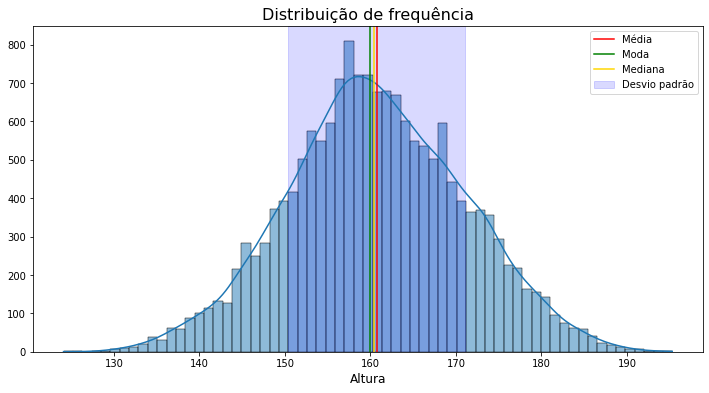

In [ ]:
#Plotando o histograma - Altura
cria_histograma("VB17004", "Altura")

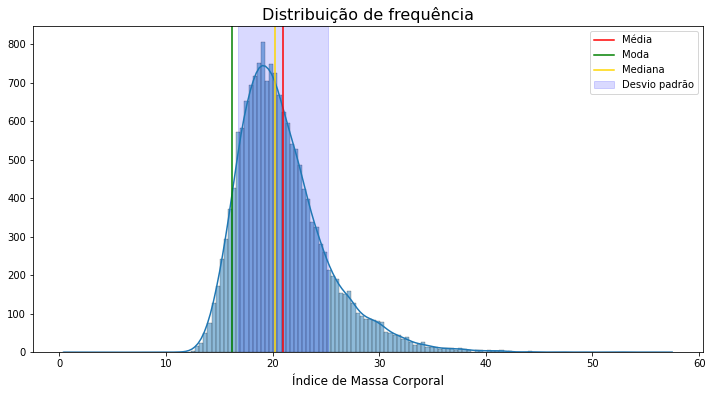

In [ ]:
#Plotando o histograma - IMC
cria_histograma("IMC", "Índice de Massa Corporal")

### Continuando a aula...

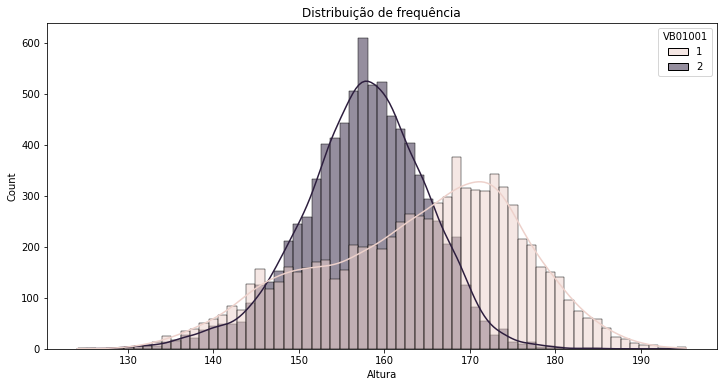

In [ ]:
#Plotando o histograma relacionando a altura e o sexo
ax = sns.histplot(x = "VB17004", data = dados, kde = True, hue = "VB01001")
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de frequência")
ax.set_xlabel("Altura")
ax;

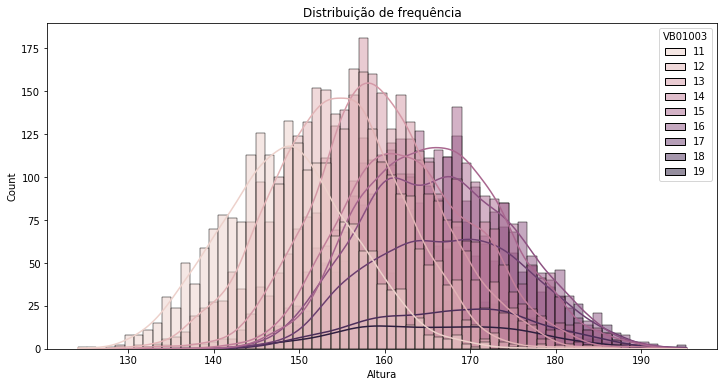

In [ ]:
#Plotando o histograma relacionando a altura e a idade
ax = sns.histplot(x = "VB17004", data = dados, kde = True, hue = "VB01003")
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de frequência")
ax.set_xlabel("Altura")
ax;

### Desafio 02: Fazer a análise com o histograma para outras informações da base de dados

In [ ]:
#Criando uma função para plotar o histograma comparando duas variáveis
def compara_histograma(cod_pergunta: str, pergunta: str, compara: str, dados = dados):

  '''
  Esta função cria um histograma a partir do código da pergunta, além disso plota o desvio padrão, a média, 
  a moda e a mediana
  
  Parâmetros:
    cod_pergunta: string com o código da pergunta
    dados: DataFrame com os dados do arquivo "PENSE_AMOSTRA2_ALUNO.CSV"
    pergunta: string com a pergunta
    compara: string com a variável a ser comparada
 '''

  #Plotando o histograma
  ax = sns.histplot(x = cod_pergunta, data = dados, kde = True, hue = compara)
  ax.figure.set_size_inches(12,6)
  ax.set_title("Distribuição de frequência", fontsize=16)
  ax.set_xlabel(f"{pergunta}", fontsize=12)
  ax.set_ylabel("")

  ax;

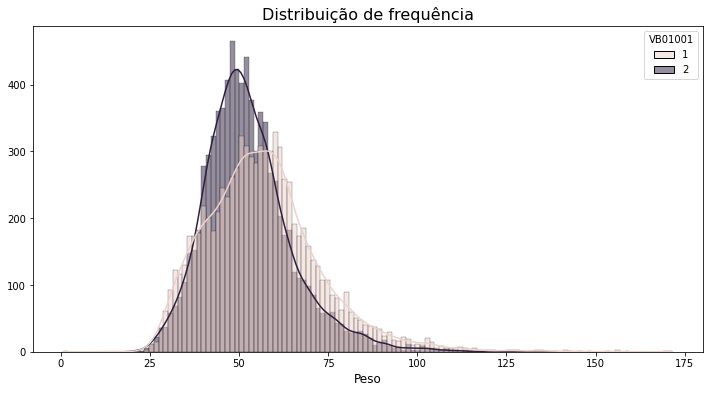

In [ ]:
#Plotando o histograma relacionando o peso e o sexo
compara_histograma("VB17003", "Peso", "VB01001")

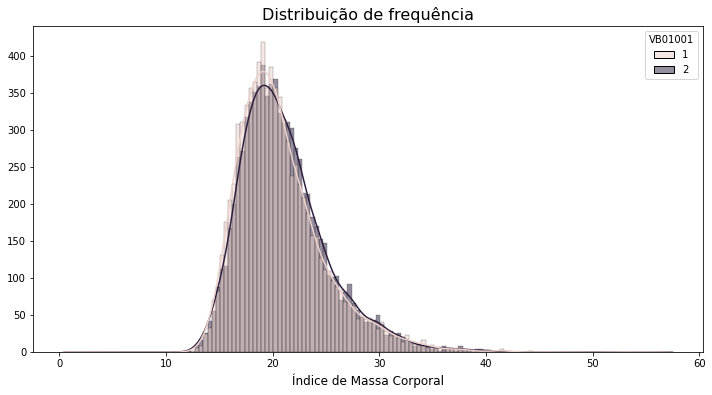

In [ ]:
#Plotando o histograma relacionando o IMC e o sexo
compara_histograma("IMC", "Índice de Massa Corporal", "VB01001")

### Continuando a aula...

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


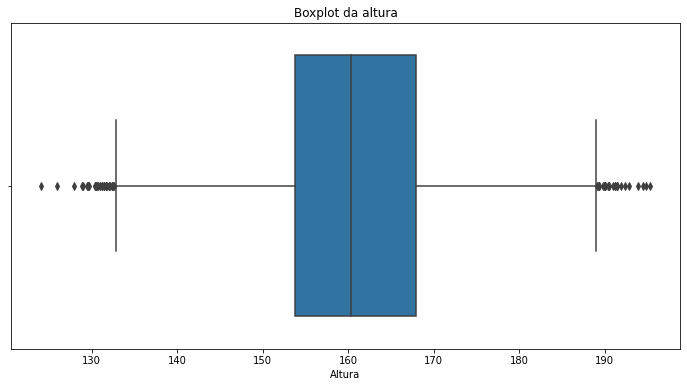

In [ ]:
#Plotando o boxplot - Altura
ax = sns.boxplot(dados["VB17004"])
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot da altura")
ax.set_xlabel("Altura")
ax;

**O que é o boxplot? Como ele é formado?**

O boxplot ou diagrama de caixa é uma ferramenta gráfica que permite visualizar a distribuição e valores discrepantes (outliers) dos dados, fornecendo assim um meio complementar para desenvolver uma perspectiva sobre o caráter dos dados. Além disso, o boxplot também é uma disposição gráfica comparativa.
<br>As medidas de estatísticas descritivas como o mínimo, máximo, primeiro quartil, segundo quartil ou mediana e o terceiro quartil formam o boxplot.
O local onde a haste vertical começa (de baixo para cima) indica o mínimo (excetuando algum possível valor extremo ou outlier) e, onde a haste termina indica o máximo (também excetuando algum possível outlier).
<br>O retângulo no meio dessa haste possui três linhas horizontais: a linha de baixo, que é o próprio contorno externo inferior do retângulo, indica o primeiro quartil. A de cima, que também é o próprio contorno externo superior do retângulo, indica o terceiro quartil. A linha interna indica o segundo quartil ou mediana.
<br>Os asteriscos ou pontos que ás vezes aparecem no boxplot indicam que aquelas observações são atípicas, valores discrepantes, extremos ou outliers.

**Como interpretar o boxplot?**

O boxplot nos fornece uma análise visual da posição, dispersão, simetria, caudas e valores discrepantes (outliers) do conjunto de dados.

- Posição – Em relação à posição dos dados, observa-se a linha central do retângulo (a mediana ou segundo quartil).
- Dispersão – A dispersão dos dados pode ser representada pelo intervalo interquatilico que é a diferença entre o terceiro quartil e o primeiro quartil (tamanho da caixa), ou ainda pela amplitude que é calculada da seguinte maneira: valor máximo – valor mínimo. Embora a amplitude seja de fácil entendimento, o intervalo interqualitico é uma estatística mais robusta para medir variabilidade uma vez que não sofre influência de outliers.
- Simetria – Um conjunto de dados que tem uma distribuição simétrica, terá a linha da mediana no centro do retângulo. Quando a linha da mediana está próxima ao primeiro quartil, os dados são assimétricos positivos e quando a posição da linha da mediana é próxima ao terceiro quartil, os dados são assimétricos negativos. Vale ressaltar que a mediana é a medida de tendência central mais indicada quando os dados possuem distribuição assimétrica, uma vez que a média aritmética é influenciada pelos valores extremos.
- Caudas – As linhas que vão do retângulo até aos outliers podem fornecer o comprimento das caudas da distribuição.
- Outliers – Já os outliers indicam possíveis valores discrepantes. No boxplot, as observações são consideradas outliers quando estão abaixo ou acima do limite de detecção de outliers.

O limite de detecção de outliers é construído utilizando o intervalo interquartílico, dado pela distância entre o primeiro e o terceiro quartil. Sendo assim, os limites inferior e superior de detecção de outlier são dados por:
- Limite Inferior = Primeiro Quartil – 1,5 * (Terceiro Quartil – Primeiro Quartil)
- Limite Superior = Terceiro Quartil + 1,5 * (Terceiro Quartil – Primeiro Quartil)

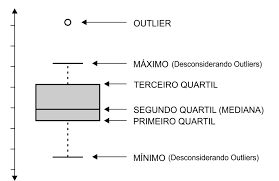

### Desafio 03: Pesquisar como é determinado os outliers no boxplot do Seaborn <br> Calcular na mão utilizando a função .quantile()

**Identificação de valores discrepantes (outliers)**
- Existe um critério baseado no intervalo interquartil para a
identificação de outliers, ou seja, valores muito
distintos da distribuição das demais observações. 
- A identificação de outliers pode ser útil para:
  - Identificar e corrigir problemas na medição das observações;
  - Evitar que dados com erros comprometam as análises e conclusões do
estudo.
- O critério estabelece os seguintes limites inferior (*LI*) e
superior (*LS*) para os valores "admissíveis":
  - *LI = Q1 - c x IQR* 
  - *LS = Q3 + c x IQR*
  - *IQR = Q3 - Q1*
   
  onde *c* é uma constante positiva; quanto maior o valor de *c*, mais
tolerante é o critério. Usualmente adota-se *c=1,5*.
- Valores de menores do que *LI* ou maiores do que *LS* são
considerados outliers.


![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Boxplot_vs_PDF_-_PT.svg/550px-Boxplot_vs_PDF_-_PT.svg.png)

https://matplotlib.org/api/cbook_api.html#matplotlib.cbook.boxplot_stats
<br>https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097

In [ ]:
#Determinando os outliers - Altura

#Calculando os quartis
Q1 = dados["VB17004"].quantile(0.25)
Q3 = dados["VB17004"].quantile(0.75)

#Calculando o intervalo interquartil
IQR = Q3 - Q1

#Calculando os limites
limite_inferior = Q1 - (1.5 * IQR)
limite_superior = Q3 + (1.5 * IQR)

print(f"O limite inferior é igual a {limite_inferior.round(2)}. Valores de altura menores que esse valor são considerados outliers.")
print(f"O limite superior é igual a {limite_superior.round(2)}. Valores de altura maiores que esse valor são considerados outliers.")

O limite inferior é igual a 132.65. Valores menores que esse valor são considerados outliers.
O limite superior é igual a 189.05. Valores maiores que esse valor são considerados outliers.


### Continuando a aula...

In [ ]:
#Calculando o primeiro quartil
dados["VB17004"].quantile(0.25)

153.8

In [ ]:
#Calculando a mediana
dados["VB17004"].quantile(0.50)

160.4

In [ ]:
#Calculando o terceiro quartil
dados["VB17004"].quantile(0.75)

167.9

In [ ]:
#Calculando o valor mínimo da altura
dados["VB17004"].min()

124.1

In [ ]:
#Calculando o valor máximo da altura
dados["VB17004"].max()

195.3

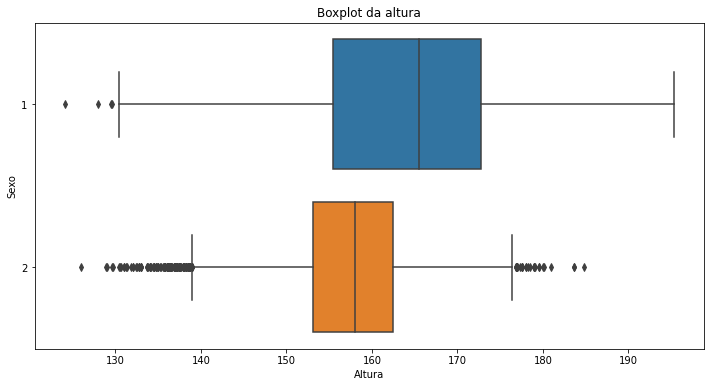

In [ ]:
#Plotando o boxplot relacionando a altura e o gênero
ax = sns.boxplot(x = "VB17004", y = "VB01001", data = dados, orient = "h")
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot da altura")
ax.set_xlabel("Altura")
ax.set_ylabel("Sexo")
ax;

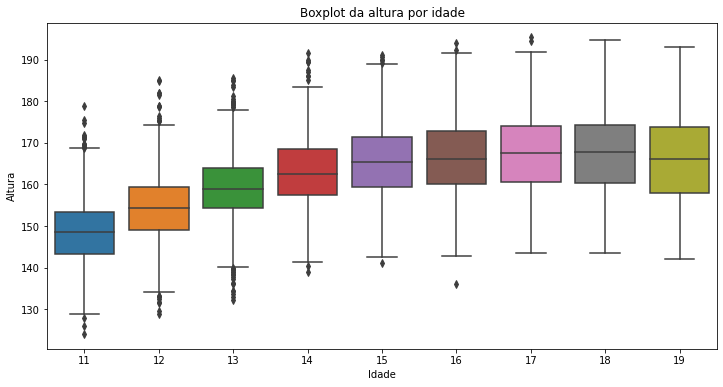

In [ ]:
#Plotando o boxplot relacionando a altura e a idade
ax = sns.boxplot(x = "VB01003", y = "VB17004", data = dados)
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot da altura por idade")
ax.set_ylabel("Altura")
ax.set_xlabel("Idade")
ax;

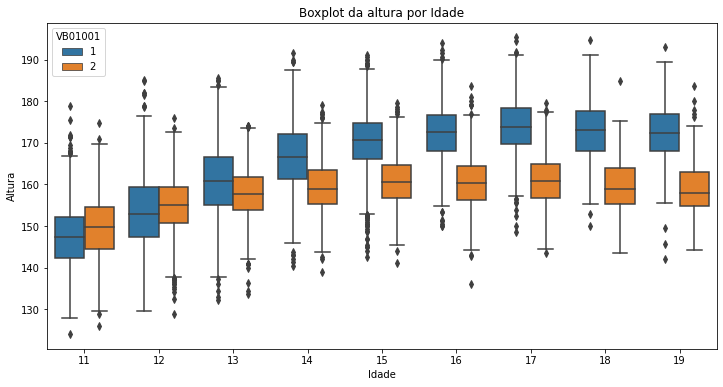

In [ ]:
#Plotando o boxplot relacionando a altura, idade e sexo
ax = sns.boxplot(x = "VB01003", y = "VB17004", hue = "VB01001", data = dados)
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot da altura por Idade")
ax.set_ylabel("Altura")
ax.set_xlabel("Idade")
ax;

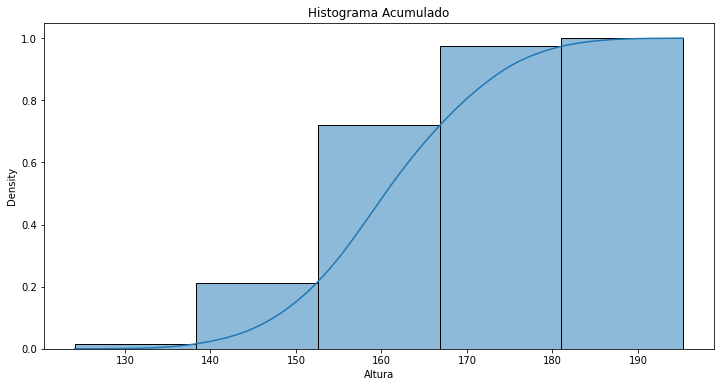

In [ ]:
#Plotando o histograma acumulado - Altura

'''
stat{“count”, “frequency”, “density”, “probability”}
Aggregate statistic to compute in each bin

count: shows the number of observations
frequency: shows the number of observations divided by the bin width
density: normalizes counts so that the area of the histogram is 1
probability: normalizes counts so that the sum of the bar heights is 1
'''

ax = sns.histplot(x = "VB17004", data = dados, kde = True, cumulative = True, stat = "density", bins = 5)
ax.figure.set_size_inches(12, 6)
ax.set_title("Histograma Acumulado")
ax.set_xlabel("Altura")
ax;